# Identifying Fraudulent Activites

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
plt.style.use('ggplot')

In [2]:
fraud = pd.read_csv('Fraud_Data.csv')
ip = pd.read_csv('IpAddress_to_Country.csv')

In [3]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


## Map IP address with country

In [5]:
country = len(fraud) * [0]

In [6]:
for ind, row in fraud.iterrows():
    temp = ip[(ip['lower_bound_ip_address'] <= row['ip_address']) & 
           (ip['upper_bound_ip_address'] > row['ip_address'])]['country']
    
    if len(temp) == 1:
        country[ind] = temp.values[0]

fraud['country'] = country

In [7]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [8]:
fraud.to_csv('fraud_country.csv')

In [9]:
df = pd.read_csv('fraud_country.csv')

## Feature Engineering

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
Unnamed: 0        151112 non-null int64
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
dtypes: float64(1), int64(5), object(7)
memory usage: 15.0+ MB


We can see we do not have missing value.

### Feature - country

In [11]:
df.country.value_counts()

United States                           58049
0                                       21966
China                                   12038
Japan                                    7306
United Kingdom                           4490
Korea Republic of                        4162
Germany                                  3646
France                                   3161
Canada                                   2975
Brazil                                   2961
Italy                                    1944
Australia                                1844
Netherlands                              1680
Russian Federation                       1616
India                                    1310
Taiwan; Republic of China (ROC)          1237
Mexico                                   1121
Sweden                                   1090
Spain                                    1027
South Africa                              838
Switzerland                               785
Poland                            

There are too many countries, let's select top 50 of them and combine the rest of them as "others".

In [12]:
largest = df.country.value_counts().nlargest(51)

In [13]:
largest = largest.reset_index()

In [14]:
la = largest['index'].tolist()

In [15]:
la.remove('0')

In [16]:
la

['United States',
 'China',
 'Japan',
 'United Kingdom',
 'Korea Republic of',
 'Germany',
 'France',
 'Canada',
 'Brazil',
 'Italy',
 'Australia',
 'Netherlands',
 'Russian Federation',
 'India',
 'Taiwan; Republic of China (ROC)',
 'Mexico',
 'Sweden',
 'Spain',
 'South Africa',
 'Switzerland',
 'Poland',
 'Argentina',
 'Indonesia',
 'Norway',
 'Colombia',
 'Turkey',
 'Viet Nam',
 'Romania',
 'Denmark',
 'Hong Kong',
 'Finland',
 'Austria',
 'Ukraine',
 'Chile',
 'Belgium',
 'Iran (ISLAMIC Republic Of)',
 'Egypt',
 'Czech Republic',
 'Thailand',
 'New Zealand',
 'Israel',
 'Saudi Arabia',
 'Venezuela',
 'Ireland',
 'European Union',
 'Greece',
 'Portugal',
 'Hungary',
 'Malaysia',
 'Singapore']

In [17]:
def other(row):
   if row['country'] not in (la):
      return 'Other'
   if row['country'] in (la):
      return row['country']

In [18]:
df['country']  = df.apply (lambda row: other(row), axis=1)

In [19]:
df.country.value_counts()

United States                      58049
Other                              25808
China                              12038
Japan                               7306
United Kingdom                      4490
Korea Republic of                   4162
Germany                             3646
France                              3161
Canada                              2975
Brazil                              2961
Italy                               1944
Australia                           1844
Netherlands                         1680
Russian Federation                  1616
India                               1310
Taiwan; Republic of China (ROC)     1237
Mexico                              1121
Sweden                              1090
Spain                               1027
South Africa                         838
Switzerland                          785
Poland                               729
Argentina                            661
Indonesia                            649
Norway          

### Feature - seconds

Let's get the length of time between signup time and purchase time. I assume that a normal customer will consider for a certain of time before he/she make a decision to purchase something.

In [20]:
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])

In [21]:

df['length'] = df.signup_time - df.purchase_time


In [22]:
df['seconds'] = df['length'].dt.seconds

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 15 columns):
Unnamed: 0        151112 non-null int64
user_id           151112 non-null int64
signup_time       151112 non-null datetime64[ns]
purchase_time     151112 non-null datetime64[ns]
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
country           151112 non-null object
length            151112 non-null timedelta64[ns]
seconds           151112 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(6), object(5), timedelta64[ns](1)
memory usage: 17.3+ MB


### Feature - device_count & ip_address_count

My assumptions are if people use the same device or ip address to signup multiple accouts, this person are suspecious.

In [24]:
device = df.groupby('device_id').count()

In [25]:
device = device.reset_index()

In [26]:
device=device[['device_id','user_id']]

In [27]:
device.columns = ['device_id','device_count']

In [28]:
device.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137956 entries, 0 to 137955
Data columns (total 2 columns):
device_id       137956 non-null object
device_count    137956 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [29]:
df2 = df.merge(device, on = 'device_id', how = 'left')

In [30]:
df2.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,length,seconds,device_count
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,-53 days +20:08:38,72518,1
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,-1 days +19:00:56,68456,1
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,-1 days +23:59:59,86399,12
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Other,-6 days +07:18:35,26315,1
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,-51 days +12:28:59,44939,1


In [31]:
ipadd = df.groupby('ip_address').count()
ipadd = ipadd.reset_index()
ipadd=ipadd[['ip_address','user_id']]
ipadd.columns = ['ip_address','ip_address_count']
ipadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143512 entries, 0 to 143511
Data columns (total 2 columns):
ip_address          143512 non-null float64
ip_address_count    143512 non-null int64
dtypes: float64(1), int64(1)
memory usage: 2.2 MB


In [32]:
df3 = df2.merge(ipadd, on = 'ip_address', how = 'left')
df3.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,length,seconds,device_count,ip_address_count
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,-53 days +20:08:38,72518,1,1
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,-1 days +19:00:56,68456,1,1
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,-1 days +23:59:59,86399,12,12
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Other,-6 days +07:18:35,26315,1,1
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,-51 days +12:28:59,44939,1,1


## Explortary Analysis


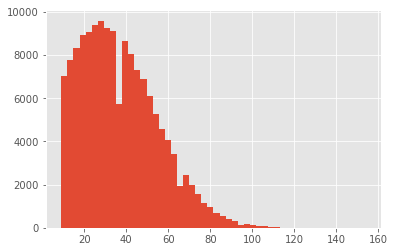

In [143]:
df3.purchase_value.hist(bins = 50)

We can see most of the purchase value is under $100.

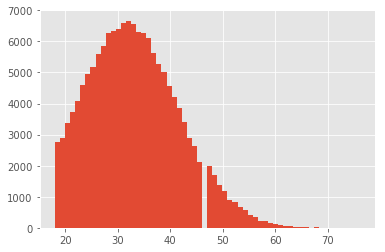

In [150]:
df3.age.hist(bins = 60)

Mode of age is around 30. But we do know that if people try to do fraudulent activities, they can put fake ages.

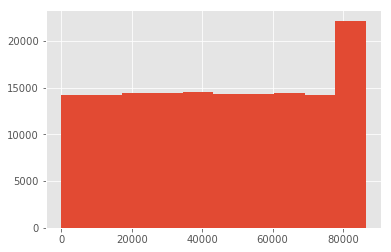

In [157]:
df3.seconds.hist(bins = 10)

We can see most of the customers will have less than 80000 seconds (22 hours) before make a purchase.

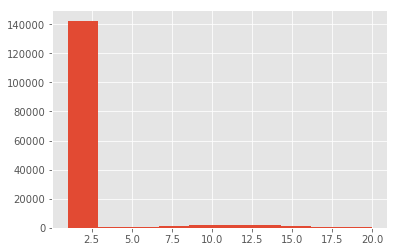

In [160]:
df3.device_count.hist(bins = 10)

This is intuitive, most of the devices only have 1 or 2 accounts assicoated with them.

In [33]:
df3.groupby('device_count').count()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,length,seconds,ip_address_count
device_count,,,,,,,,,,,,,,,,
1,131781,131781,131781,131781,131781,131781,131781,131781,131781,131781,131781,131781,131781,131781,131781,131781
2,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654,10654
3,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270
4,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
5,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
6,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174,174
7,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350
8,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552
9,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702,702


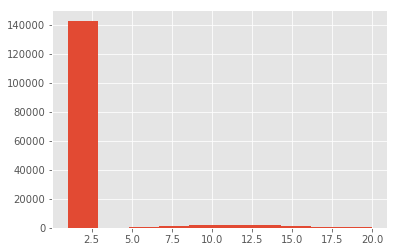

In [161]:
df3.ip_address_count.hist(bins = 10)

Ip address is like device, only 1 or 2 accounts associated with 1 ip address.

In [34]:
df3.groupby('ip_address_count').count()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,length,seconds,device_count
ip_address_count,,,,,,,,,,,,,,,,
1,142752,142752,142752,142752,142752,142752,142752,142752,142752,142752,142752,142752,142752,142752,142752,142752
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
5,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
6,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
7,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350,350
8,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568,568
9,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738,738


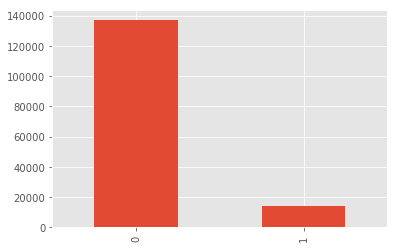

In [152]:
df3['class'].value_counts().plot(kind = 'bar')

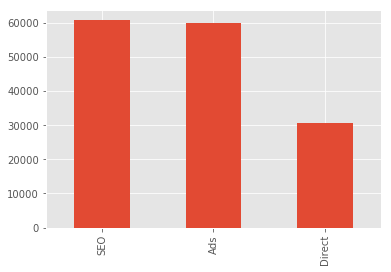

In [146]:
df3.source.value_counts().plot(kind = 'bar')

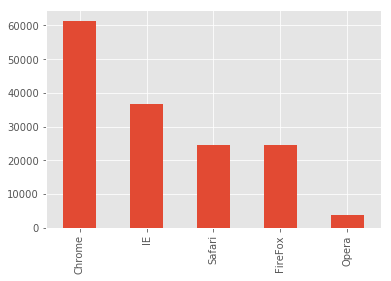

In [147]:
df3.browser.value_counts().plot(kind = 'bar')

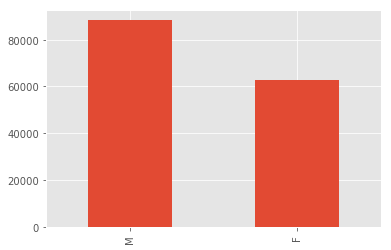

In [148]:
df3.sex.value_counts().plot(kind = 'bar')

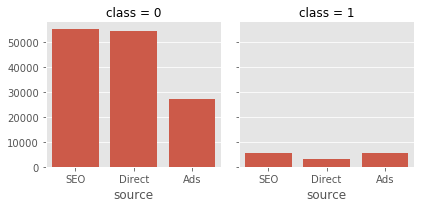

In [173]:
sns.FacetGrid(df3, col='class').map(sns.countplot,'source')

Based on this plot, my assumption are if customers come from Ads, then they are more likely to be a fraud.

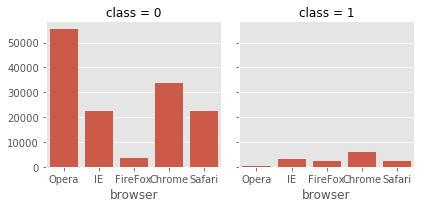

In [174]:
sns.FacetGrid(df3, col='class').map(sns.countplot,'browser')

Based on this plot, my assumption are if customers come from Opera, then they are less likely to be a fraud.

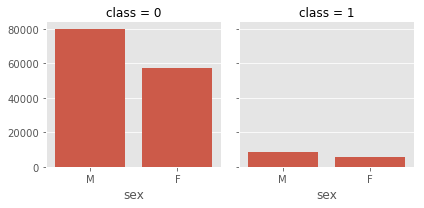

In [175]:
sns.FacetGrid(df3, col='class').map(sns.countplot,'sex')

In [35]:
sex = df3.groupby(['sex','class']).count()['user_id']


In [36]:
sex = sex.reset_index().pivot(index = 'sex', columns = 'class', values = 'user_id')

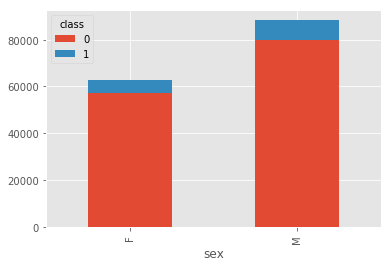

In [37]:
sex.plot(kind='bar', stacked=True)

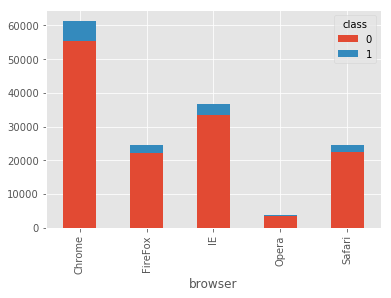

In [38]:
browser = df3.groupby(['browser','class']).count()['user_id']
browser = browser.reset_index().pivot(index = 'browser', columns = 'class', values = 'user_id')
browser.plot(kind='bar', stacked=True)

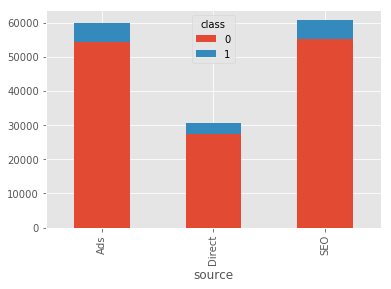

In [39]:
source = df3.groupby(['source','class']).count()['user_id']
source = source.reset_index().pivot(index = 'source', columns = 'class', values = 'user_id')
source.plot(kind='bar', stacked=True)

## Build Model

In [40]:
df3.head()

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,length,seconds,device_count,ip_address_count
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,-53 days +20:08:38,72518,1,1
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,-1 days +19:00:56,68456,1,1
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,-1 days +23:59:59,86399,12,12
3,3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Other,-6 days +07:18:35,26315,1,1
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,-51 days +12:28:59,44939,1,1


In [41]:
df4 = df3[['class','purchase_value','source','browser','sex','age','country','seconds','device_count','ip_address_count']]

In [42]:
df4.head()

,class,purchase_value,source,browser,sex,age,country,seconds,device_count,ip_address_count
0,0,34,SEO,Chrome,M,39,Japan,72518,1,1
1,0,16,Ads,Chrome,F,53,United States,68456,1,1
2,1,15,SEO,Opera,M,53,United States,86399,12,12
3,0,44,SEO,Safari,M,41,Other,26315,1,1
4,0,39,Ads,Safari,M,45,United States,44939,1,1


In [43]:
df4.to_csv('clean_data.csv')

In [44]:
df4 = pd.read_csv('clean_data.csv')

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
# too many dimensions,so use label encoder

In [46]:
lb = LabelEncoder()
df4['source'] = lb.fit_transform(df4['source'])
df4['browser'] = lb.fit_transform(df4['browser'])
df4['sex'] = lb.fit_transform(df4['sex'])
df4['country'] = lb.fit_transform(df4['country'])

In [47]:
df4.head()

,Unnamed: 0,class,purchase_value,source,browser,sex,age,country,seconds,device_count,ip_address_count
0,0,0,34,2,0,1,39,25,72518,1,1
1,1,0,16,0,0,0,53,48,68456,1,1
2,2,1,15,2,3,1,53,48,86399,12,12
3,3,0,44,2,4,1,41,32,26315,1,1
4,4,0,39,0,4,1,45,48,44939,1,1


In [81]:
X = df4[['purchase_value','source','browser','sex','age','country','seconds','device_count','ip_address_count']]
y = df4['class']

### Use Random Forest to get important features

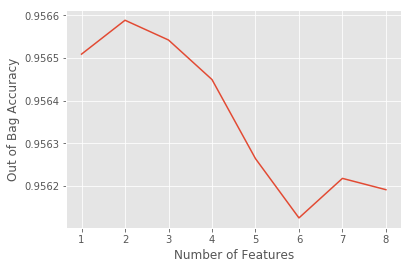

In [49]:
Features = range(1,9)
oob_score_RF = []
for i in Features:
        RFClass = RandomForestClassifier(n_estimators = 100, #Number of trees - the more the better!
                           max_features = i,     #How many features to randomly choose in each node 
                           min_samples_leaf = 5, #Minimum number of observations at each terminal node
                           oob_score = True,
                           random_state = 1,
                           n_jobs = -1)
        RFClass.fit(X,y)  
        oob_score_RF.append(RFClass.oob_score_)

plt.plot(Features, oob_score_RF)
plt.xlabel("Number of Features")
plt.ylabel("Out of Bag Accuracy")
plt.show()

In [50]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(X, y, test_size = 0.3)

C:\Users\rwang\AppData\Local\Continuum\Miniconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [51]:
rf = RandomForestClassifier(n_estimators= 100, criterion = 'entropy', max_depth= 10, min_samples_leaf= 5,min_samples_split= 3, max_features = 6,oob_score= True)

In [52]:
rf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [53]:
from sklearn.metrics import classification_report, roc_curve, auc
print(classification_report(labels_test, rf.predict(features_test)))

             precision    recall  f1-score   support

          0       0.95      1.00      0.98     41032
          1       1.00      0.55      0.71      4302

avg / total       0.96      0.96      0.95     45334



We get pretty great results with accuracy of 0.96. Precision 0.95 and recall 0.54. We capture all the non-fraudulent activities 95% of the time and fraudulent activities 54% of the time.

In [54]:
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

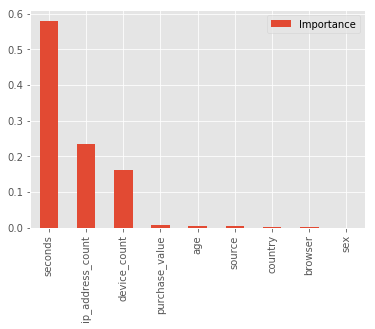

In [55]:
importance = rf.feature_importances_
feature_names = X.columns.values 
df1 = pd.DataFrame(importance,columns=['Importance'],index = feature_names)
df1 = df1.sort_values(['Importance'],ascending=False)
df1.plot(kind = 'bar')

The time gap between signup and purchase time, ip address count and device counts are the most important features to predict fraudulent activities.

## Use Decision Tree with important features 

In [56]:
X1 = X[['seconds','ip_address_count','device_count']]

In [57]:
features_train, features_test, labels_train, labels_test = train_test_split(X1, y, test_size = 0.3)

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

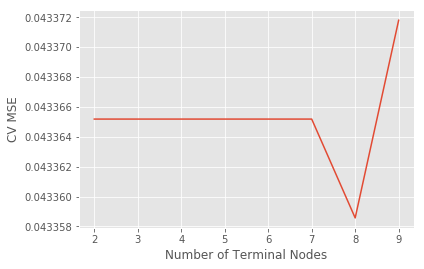

In [239]:
# find the max_leaf_nodes
Maximum_Terminal_Nodes = range(2,10)
score = []
for i in Maximum_Terminal_Nodes :
        tree = DecisionTreeClassifier(max_leaf_nodes = i, 
                                        min_samples_leaf = 5, 
                                        random_state = 24)  
        score.append(-cross_val_score(tree, X, y, cv=5, scoring = 'neg_mean_squared_error').mean())

plt.plot(Maximum_Terminal_Nodes, score)
plt.xlabel("Number of Terminal Nodes")
plt.ylabel("CV MSE")
plt.show()

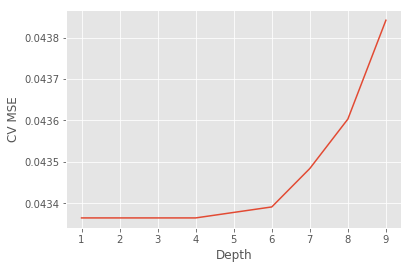

In [241]:
# find the max_depth
Maximum_Depth = range(1,10)
score = []
for i in Maximum_Depth:
        tree = DecisionTreeClassifier(max_depth= i, 
                                        min_samples_leaf = 5, 
                                        random_state = 24)  #You could set random_state to any number
        score.append(-cross_val_score(tree, X, y, cv=5, scoring = 'neg_mean_squared_error').mean())

plt.plot(Maximum_Depth, score)
plt.xlabel("Depth")
plt.ylabel("CV MSE")
plt.show()

In [59]:

dec = DecisionTreeClassifier(max_leaf_nodes = 8,min_samples_leaf = 5,max_depth=8 )
dec.fit(features_train,labels_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [60]:
from sklearn.metrics import classification_report, roc_curve, auc
print(classification_report(labels_test, dec.predict(features_test)))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     41183
          1       0.99      0.54      0.70      4151

avg / total       0.96      0.96      0.95     45334



In [61]:
from sklearn.metrics import confusion_matrix
y_hat = dec.predict(X1)
confmat = confusion_matrix(y, y_hat)
TP = confmat[0,0] #True Positive
FP = confmat[1,0] #False Positive
FN = confmat[0,1] #False Negative
TN = confmat[1,1] #True Negative
Err = float(FP + FN)/(FP + FN + TP + TN) #Prediction Error
Acc = float(TP + TN)/(FP + FN + TP + TN) #Prediction Accuracy
FPR = float(FP)/(FP + TN)  #False Positive Rate
TNR = float(TN)/(FP + TN)  #True Negative Rate
TPR = float(TP)/(FN + TP)  #True Positive Rate
FNR = float(FN)/(FN + TP)  #False Negative Rate
print("False Positive Rate = %f" %FPR)
print("False Negative Rate = %f" %FNR)
print("True Positive Rate = %f" %TPR)
print("True Negative Rate = %f" %TNR)
print("Misclassification Error = %f" %Err)
print("Accuracy = %f" %Acc)

False Positive Rate = 0.461946
False Negative Rate = 0.000183
True Positive Rate = 0.999817
True Negative Rate = 0.538054
Misclassification Error = 0.043425
Accuracy = 0.956575


In [62]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = dec.predict_proba(X1).T[1]  


print(y_hat_probability)
print("AUC is %f " %roc_auc_score(y, y_hat_probability)) 


vals = roc_curve(y, y_hat_probability) 
#vals[0] is False Positive Rate
#vals[1] is True Positive Rate

[ 0.03086728  0.03086728  0.99981322 ...,  0.03086728  0.22556808
  0.03086728]
AUC is 0.843373 


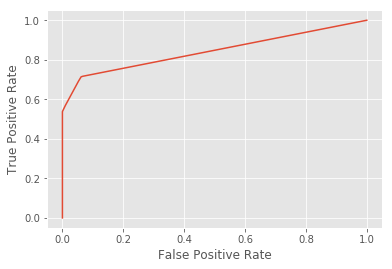

In [63]:
# show roc curve
plt.plot(vals[0], vals[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:

roc = pd.DataFrame(vals,columns = ['fp','tp','thresholds'])
roc

FP - we think it is a fraudulent activity, but it turns out not. - waste human resource to identify it
FN - (1-TP) it is real fraud, but we miss it. - the company will lose money

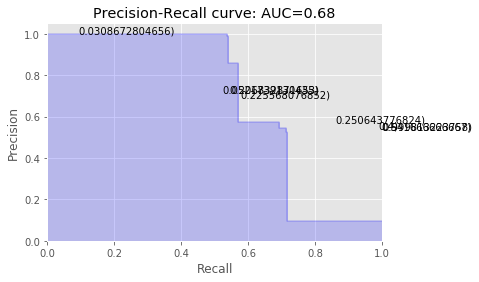

In [94]:
from sklearn.metrics import precision_recall_curve,average_precision_score
y_hat_probability = dec.predict_proba(X1).T[1]
precision, recall, thresholds= precision_recall_curve(y, y_hat_probability) 
average_precision = average_precision_score(y, y_hat_probability)

# show precision-recall curve
fig = plt.figure()

ax = fig.add_subplot(111)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))
for i,j,k in zip(precision, recall, thresholds):
    ax.annotate('%s)' %k, xy=(i,j),textcoords='data')




In [98]:
pr = zip(precision, recall, thresholds)
pr = pd.DataFrame(pr,columns = ['precision','recall','thresholds'])
pr

,precision,recall,thresholds
0,0.093646,1.000000,0.030867
1,0.524571,0.716628,0.052174
2,0.545410,0.713801,0.206833
3,0.575717,0.691259,0.225568
4,0.860597,0.568440,0.250644
5,0.989637,0.539891,0.400000
6,0.996727,0.538054,0.541667
7,0.999737,0.537065,0.999813


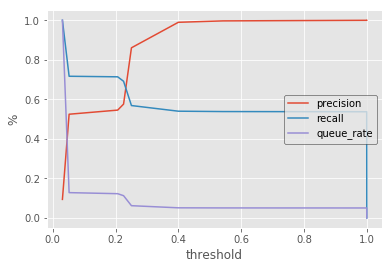

In [100]:
precision, recall, thresholds = precision_recall_curve(y, y_hat_probability) 
thresholds = np.append(thresholds, 1) 
queue_rate = [] 
for threshold in thresholds: 
    queue_rate.append((y_hat_probability >= threshold).mean()) 
plt.plot(thresholds, precision, color=sns.color_palette()[0]) 
plt.plot(thresholds, recall, color=sns.color_palette()[1]) 
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2]) 
leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')

Presicion - among all my predicited fraud, % of real fraud, higher % means we have less false positive and save our human cost to identify real fraud or not

Recall - among all the real fraud, % of fraud are predicited, higher % means we have more accuracy and save our cost by prevent fraud

Threshold - the probability we will cut off for fraudulent activities, higher probability means less activites/users we should check and save our human cost

queue_rate - how many users we will block for further investigation

In this case, I would suggest a threshold around 0.4. If we have 10000 users coming in every day, then:
* About 8% activities will be queued, so it's 800 cases to be reviewed every day
* Our precision is 99%, which means, among 800 cases, 99% of them are real fraudulent activites
* Our recall is 52%, which means, 800 cases we captured in this queue is about 52% of the total real fraudulent activities


We can always adjust our threshold to match our human recources, cost and other situation.

In [1]:
from sklearn.tree import export_graphviz
from graphviz import Source



In [3]:
from sklearn.externals import joblib

In [45]:
joblib.dump(dec, 'dec.pkl')

['dec.pkl']

In [46]:
dec = joblib.load('dec.pkl')

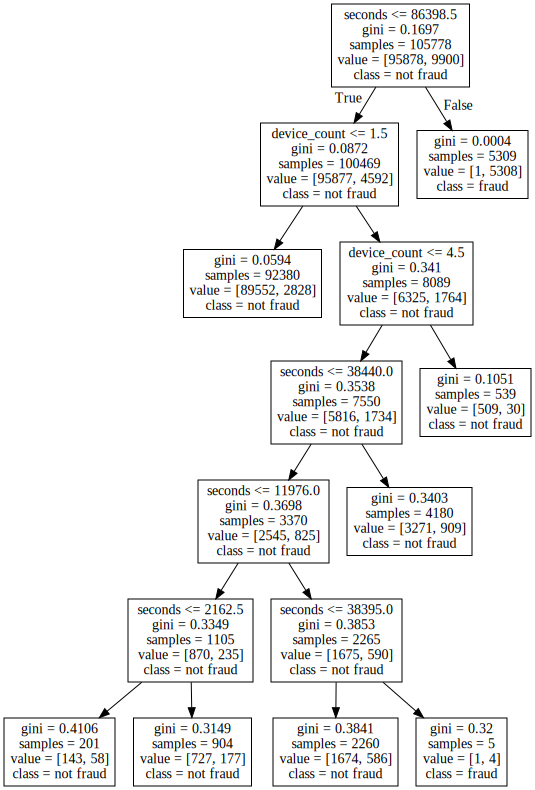

In [47]:

Source(export_graphviz(dec, out_file=None, feature_names=X1.columns, class_names = ['not fraud','fraud']))

The most important feature in decision are seconds. If seconds > 86398.5 (24 hours), then they are most likely fraud. Also, if the device > 4.5, they have a better chance to be fraud.

## Use Logistc Regression with important features


In [117]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver = 'lbfgs', max_iter  = 10000)
lg.fit(X1,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

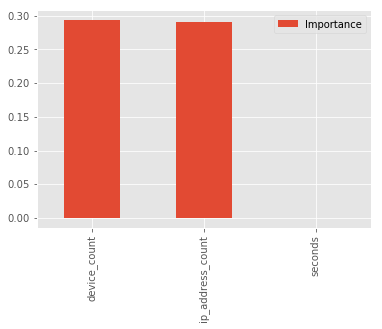

In [118]:

importance = lg.coef_.T
feature_names = X1.columns.values 
df_lg = pd.DataFrame(importance,columns=['Importance'],index = feature_names)
df_lg = df_lg.sort_values(['Importance'],ascending=False)
df_lg.plot(kind = 'bar')

In [112]:
import statsmodels.api as sm
logit = sm.Logit(y, X1)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.356713
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:               151112
Model:                          Logit   Df Residuals:                   151109
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Oct 2017   Pseudo R-squ.:                 -0.1474
Time:                        10:55:55   Log-Likelihood:                -53904.
converged:                       True   LL-Null:                       -46980.
                                        LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
seconds          -6.532e-05   3.38e-07   -193.439      0.000    -6.6e-05   -6.47e-05
ip_address_count     0.2917      0.020     14.471      0.000       0.252       0.331
device_count         0.2563      0.020     12.814      0.000       0.217       0.296
====================================================================================
"""

Hold other things constant, The odds of fraudulent activites will be increased by 29.17% with 1 more ip address count, and increased by 25.63% with 1 more device count.


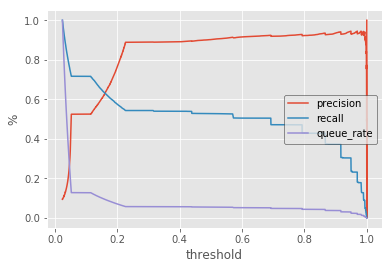

In [114]:
y_hat_probability = lg.predict_proba(X1).T[1]
precision, recall, thresholds = precision_recall_curve(y, y_hat_probability) 
thresholds = np.append(thresholds, 1) 
queue_rate = [] 
for threshold in thresholds: 
    queue_rate.append((y_hat_probability >= threshold).mean()) 
plt.plot(thresholds, precision, color=sns.color_palette()[0]) 
plt.plot(thresholds, recall, color=sns.color_palette()[1]) 
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2]) 
leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')

I would also suggest to cut off around threshold = 0.2. We can do more check for people within 0.2 to 0.4 to get more information for us to make a decision about fraud. And for people > 0.4, we then involve human recources to manually check this user. This approach could save us human cost and give customer better experience by avoiding waiting for a long time.

What I can improve:
* When training model, first down sample the data to make it not that skewed. There are too many 0s in training set.
* Instead of labelencoder, I could also try conditional probability encoding.

reference: 
* https://medium.com/airbnb-engineering/designing-machine-learning-models-7d0048249e69
* https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415
